## An Introduction to Cartopy Plotting with Xarray.

If you work with Meteorology, or anything within the range of the so called 'Environmental Sciences', you must probably be somewhat familiar with NetCDF files.

There are many ways to work with this kind of file, with the help of software such as: GrADS, CDO, good old Fortran, MATLAB and, of course, Python.

Thanks to the dynamics of Python you can handle this task according to your own taste, since there are many packages devoted to this. Here we will use two useful ones: Xarray (to handle our data) and Cartopy (to plot it).

By the way, you can also check [Dr. Nicolas Fauchereau's great introduction to Xarray too.](http://nicolasfauchereau.github.io/climatecode/posts/xray/)

In [4]:
import matplotlib.pyplot   as plt
import cartopy.crs         as ccrs
import cartopy.feature     as cf
import cartopy             as cartopy
import numpy               as np
import xarray              as xr

from cartopy.mpl.ticker    import LongitudeFormatter, LatitudeFormatter

Above we are just importing everything we will need: Matplotlib, Cartopy, NumPy as Xarray.


Now we get some data. This will be GPCC Precipitation dataset$^{1}$.

In [5]:
dset  =  xr.open_dataset('precip.mon.total.1x1.v7.nc')
var   =  dset['precip'][:,:,:]
lat   =  dset['lat'][:]
lon   =  dset['lon'][:]

An important warning: it's absolutely necessary to know well the data you will use so you can handle it properly. You can do this with the aid of 'ncdump'. Also, it's important to know how the packages you're using will handle your files, so please check their docs first (exercises left for the reader).


So far, so good. Our dataset has 'precip' as a variable and it's a three-dimensional variable (time, lat, lon); we are also treating the latitude and longitude values and separated variables.

In [6]:
print (var.shape, lat.shape, lon.shape)

(1356, 180, 360) (180,) (360,)


That's it: 'precip' has (time, lat, lon) attributes and we just checked it, just so you see there are no lies here (for now).



Our goal here will be to plot precipitation over South America for some random month. We can select the area easily with the 'sel' and 'slice' functions from xarray: 

In [7]:
var  =  var.sel( lat=slice(12,-50),lon=slice(270,330) )

In [8]:
print (var.shape)

(1356, 62, 60)


We can see that the functions really sliced our data, so some grid points where thrown away and our area is now smaller than before.

To plot it later, we have to do the same to our lat/lon variables.

In [9]:
lon  =  var.sel(lon=slice(270,330))  
lon  =  np.asarray(lon.lon.values)

lat  =  var.sel(lat=slice(12,-50)) 
lat  =  np.asarray(lat.lat.values)

There are countless and more elegant ways to write these lines above, and you are certainly encouraged to write your own. Anyway, they work for our purposes (converting from xarray data array to numpy arrays so we can plot).

Since we have everything we need, let's plot it!

In [10]:
plt.figure(figsize=(8,4))
proj  =  ccrs.PlateCarree()
ax = plt.axes(projection=proj)
inter = np.arange(0, 800, 100)

We defined the Plate Carrée projection but Cartopy has [many others.](http://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html)

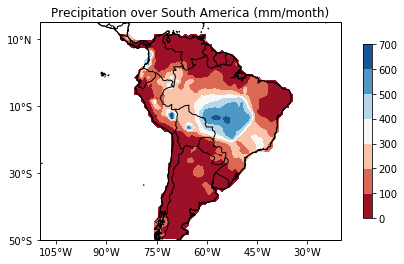

In [11]:
ax.set_extent([250, 340, -50, 15], proj)             
ax.add_feature(cf.BORDERS)
ax.add_feature(cf.COASTLINE)
ax.coastlines(resolution='50m',color='black')
x_lons = np.arange(-105,-15,15)
y_lats = np.arange(-50,30,20)
tick_fs = 16
ax.set_xticks(x_lons, minor=False, crs=proj)
ax.set_yticks(y_lats, minor=False, crs=proj)
lon_formatter = LongitudeFormatter(zero_direction_label=True,
                                   number_format='.0f')
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

plt.contourf(lon, lat, var[0,:,:], inter,
             transform=proj,
             cmap=plt.get_cmap('RdBu'))
plt.colorbar(ax=ax, shrink=0.8)
plt.title(u'Precipitation over South America (mm/month)')

plt.show()


Voilà! As you can see, Matplotlib is very well integrated with Cartopy. If you have some experience with the former, you won't have much trouble with the latter.

Have in mind that we just plotted one month (the first, since we used var[0,:,:]) to give a simple example on how to handle netCDF files and plot them easily. Over the next notebooks we shall increase the difficulty and get into Climate Statistics for real.

Hope you have enjoyed it!

## REFERENCES

1 - Rudolf, B., and M. Ziese. "GPCC Full Data Reanalysis Version 7.0 at 0.5: Monthly Land-Surface Precipitation from Rain-Gauges built on GTS-based and Historic Data".